In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import math 

In [3]:
X_test = pd.read_csv('data/X_test.csv')
X_train = pd.read_csv('data/X_train.csv')
y_test = pd.read_csv('data/y_test.csv')
y_train = pd.read_csv('data/y_train.csv')

In [7]:
model = AdaBoostRegressor(random_state=1, base_estimator = DecisionTreeRegressor(random_state = 1))
grid = dict()
grid['n_estimators'] = [10, 50, 100,200]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['base_estimator__max_depth'] = [3, 5, 10, 15]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error').fit(X_train, y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']


KeyboardInterrupt: 

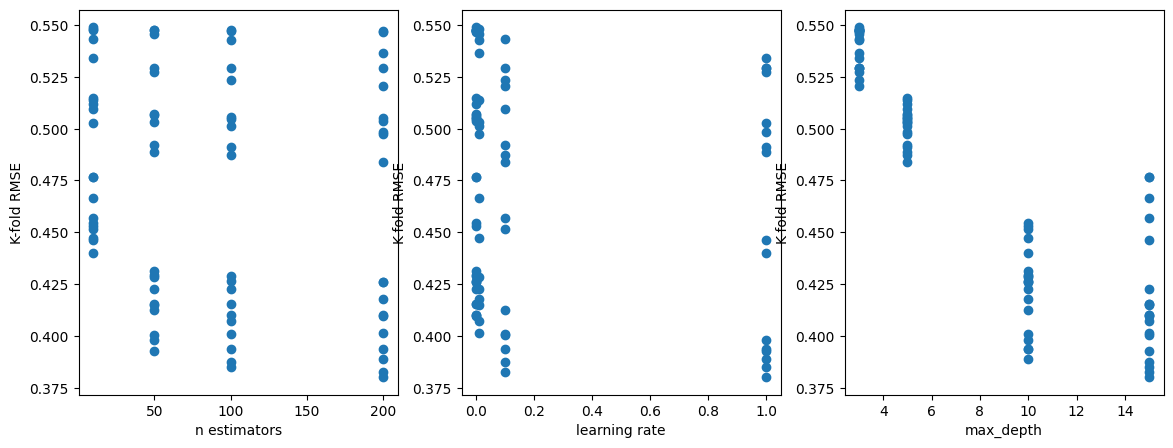

In [ ]:
# Plotting results
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(1,3,figsize=(14,5))
plt.subplots_adjust(wspace=0.2)
axes[0].plot(cv_results.param_n_estimators, -cv_results.mean_test_score, 'o')
axes[0].set_xlabel('n estimators')
axes[0].set_ylabel('K-fold RMSE')
axes[1].plot(cv_results.param_learning_rate, -cv_results.mean_test_score, 'o')
axes[1].set_xlabel('learning rate')
axes[1].set_ylabel('K-fold RMSE');
axes[2].plot(cv_results.param_base_estimator__max_depth, -cv_results.mean_test_score, 'o')
axes[2].set_xlabel('max_depth')
axes[2].set_ylabel('K-fold RMSE');


In [ ]:
ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15, random_state=1),n_estimators=200,learning_rate=1.0,
                         random_state=1).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Fine search 
model = AdaBoostRegressor(random_state=1, base_estimator = DecisionTreeRegressor(random_state = 1))
grid = dict()
grid['n_estimators'] = [200, 500, 1000]
grid['learning_rate'] = [.5, .75, 1.0]
grid['base_estimator__max_depth'] = [12,14,16]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error').fit(X_train, y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best: -0.377182 using {'base_estimator__max_depth': 14, 'learning_rate': 1.0, 'n_estimators': 1000}


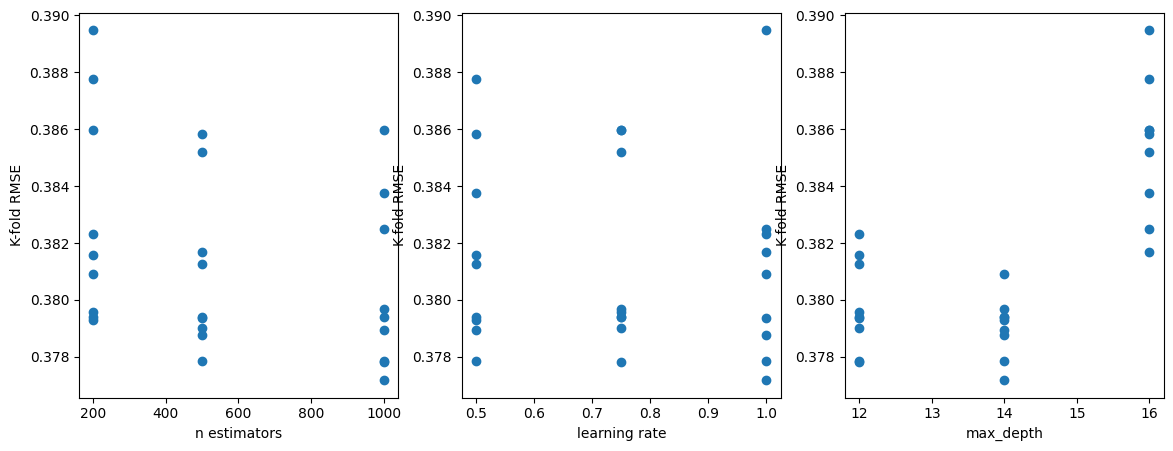

In [ ]:
# Plotting results
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(1,3,figsize=(14,5))
plt.subplots_adjust(wspace=0.2)
axes[0].plot(cv_results.param_n_estimators, -cv_results.mean_test_score, 'o')
axes[0].set_xlabel('n estimators')
axes[0].set_ylabel('K-fold RMSE')
axes[1].plot(cv_results.param_learning_rate, -cv_results.mean_test_score, 'o')
axes[1].set_xlabel('learning rate')
axes[1].set_ylabel('K-fold RMSE');
axes[2].plot(cv_results.param_base_estimator__max_depth, -cv_results.mean_test_score, 'o')
axes[2].set_xlabel('max_depth')
axes[2].set_ylabel('K-fold RMSE');


In [6]:
ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=14, random_state=1),n_estimators=1000,learning_rate=1.0,
                         random_state=1).fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Finer search 
model = AdaBoostRegressor(random_state=1, base_estimator = DecisionTreeRegressor(random_state = 1))
grid = dict()
grid['n_estimators'] = [800, 1000, 1200, 1500]
grid['learning_rate'] = [.75, 1.0, 1.5]
grid['base_estimator__max_depth'] = [13, 14,15, 16]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error').fit(X_train, y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best: -0.372576 using {'base_estimator__max_depth': 13, 'learning_rate': 1.5, 'n_estimators': 1500}


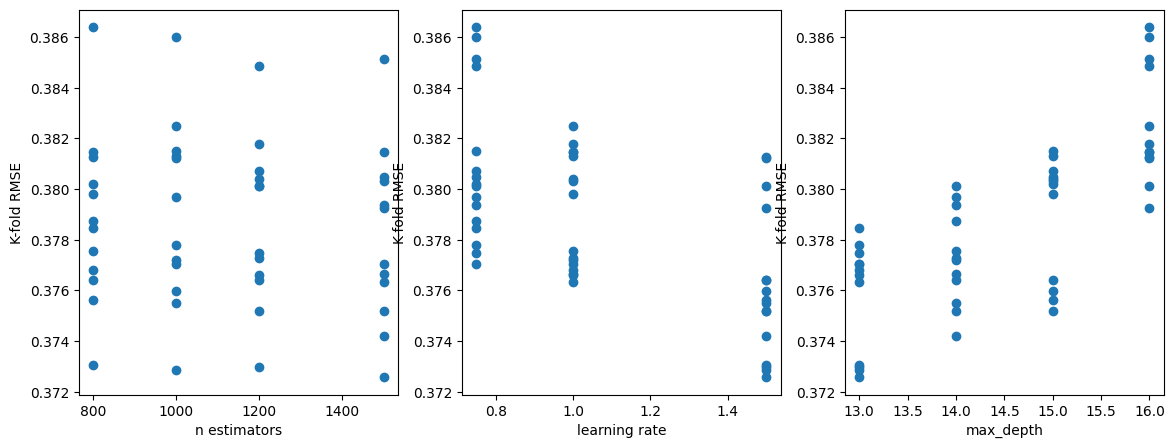

In [30]:
# Plotting results
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(1,3,figsize=(14,5))
plt.subplots_adjust(wspace=0.2)
axes[0].plot(cv_results.param_n_estimators, -cv_results.mean_test_score, 'o')
axes[0].set_xlabel('n estimators')
axes[0].set_ylabel('K-fold RMSE')
axes[1].plot(cv_results.param_learning_rate, -cv_results.mean_test_score, 'o')
axes[1].set_xlabel('learning rate')
axes[1].set_ylabel('K-fold RMSE');
axes[2].plot(cv_results.param_base_estimator__max_depth, -cv_results.mean_test_score, 'o')
axes[2].set_xlabel('max_depth')
axes[2].set_ylabel('K-fold RMSE');


In [7]:
#Best model 
ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=13, random_state=1),n_estimators=1500,learning_rate=1.5,
                         random_state=1).fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Finer search 2
model = AdaBoostRegressor(random_state=1, base_estimator = DecisionTreeRegressor(random_state = 1), n_estimators = 1500)
grid = dict()
grid['learning_rate'] = [1.25, 1.5, 2]
grid['base_estimator__max_depth'] = [12, 13, 14]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error', verbose = True).fit(X_train, y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best: -0.372576 using {'base_estimator__max_depth': 13, 'learning_rate': 1.5}


2

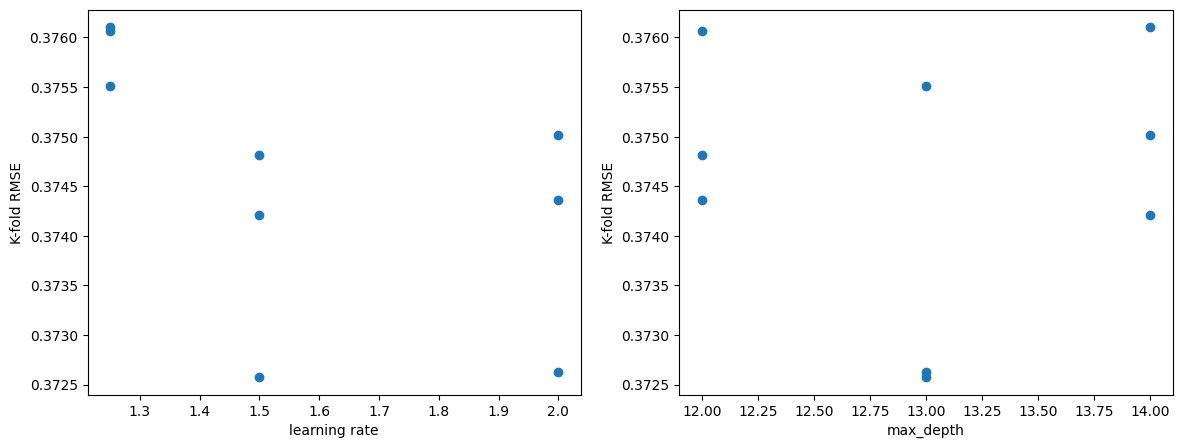

In [39]:
# Plotting results
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(1,2,figsize=(14,5))
plt.subplots_adjust(wspace=0.2)
axes[0].plot(cv_results.param_learning_rate, -cv_results.mean_test_score, 'o')
axes[0].set_xlabel('learning rate')
axes[0].set_ylabel('K-fold RMSE');
axes[1].plot(cv_results.param_base_estimator__max_depth, -cv_results.mean_test_score, 'o')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('K-fold RMSE');


In [4]:
# optimizing n estimators
model = AdaBoostRegressor(random_state=1, base_estimator = DecisionTreeRegressor(random_state = 1, max_depth = 13), learning_rate = 1.5)
grid = dict()
grid['n_estimators'] = [1000, 1500, 2000, 3000, 4000]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error', verbose = True).fit(X_train, y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best: -0.372992 using {'n_estimators': 2000}


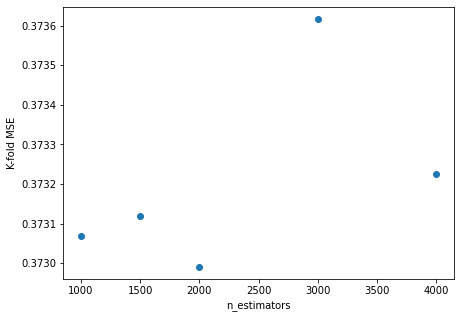

In [6]:
# Plotting results
cv_results = pd.DataFrame(grid_search.cv_results_)
fig, axes = plt.subplots(1,1,figsize=(7,5))
plt.subplots_adjust(wspace=0.2)
axes.plot(cv_results.param_n_estimators, -cv_results.mean_test_score, 'o')
axes.set_xlabel('n_estimators')
axes.set_ylabel('K-fold MSE');

In [45]:
ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=13, random_state=1),n_estimators=2000,learning_rate=1.5,
                         random_state=1).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [3]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [8]:
raw_test_pred = ada_model.predict(X_test)
test_pred = np.array([round_half_up(xi) for xi in raw_test_pred])

raw_train_pred = ada_model.predict(X_train)
train_pred = np.array([round_half_up(xi) for xi in raw_train_pred])

In [11]:
test_pred = pd.Series(test_pred)

In [12]:
test_pred.to_csv("adaboost_pred.csv")

In [47]:
# model 4: opt
print("AdaBoost model Train RMSE = ", np.sqrt(mean_squared_error(y_train, train_pred)))
print("AdaBoost model Test RMSE = ", np.sqrt(mean_squared_error(y_test, test_pred)))

AdaBoost model Train RMSE =  0.0
AdaBoost model Test RMSE =  0.6650621717611762


In [34]:
# model 3
print("AdaBoost model Train RMSE = ", np.sqrt(mean_squared_error(y_train, train_pred)))
print("AdaBoost model Test RMSE = ", np.sqrt(mean_squared_error(y_test, test_pred)))

AdaBoost model Train RMSE =  0.0
AdaBoost model Test RMSE =  0.6586699885725429


In [ ]:
# model 2
print("AdaBoost model Train RMSE = ", np.sqrt(mean_squared_error(y_train, train_pred)))
print("AdaBoost model Test RMSE = ", np.sqrt(mean_squared_error(y_test, test_pred)))

AdaBoost model Train RMSE =  0.0
AdaBoost model Test RMSE =  0.6673714223613529


In [ ]:
# model 1 
print("AdaBoost model Train RMSE = ", np.sqrt(mean_squared_error(y_train, train_pred)))
print("AdaBoost model Test RMSE = ", np.sqrt(mean_squared_error(y_test, test_pred)))

AdaBoost model Train RMSE =  0.0
AdaBoost model Test RMSE =  0.6742517219966031


In [9]:
pd.DataFrame({"predictors":X_train.columns, "importance":ada_model.feature_importances_}).sort_values("importance", ascending = False)

,predictors,importance
10,alcohol,0.172094
5,free sulfur dioxide,0.118778
1,volatile acidity,0.101525
6,total sulfur dioxide,0.091241
3,residual sugar,0.083584
9,sulphates,0.082968
4,chlorides,0.074744
8,pH,0.073256
7,density,0.068112
0,fixed acidity,0.067019
